In [124]:
import sympy as sp
from mira.metamodel import *
from mira.sources.sympy_ode import template_model_from_sympy_odes
from mira.modeling.amr.petrinet import template_model_to_petrinet_json_file

# Define time variable
t = sp.symbols("t")

# Define time-dependent variables
S_l, S_h, E_h, P, I1, I2, H, R_h, S_r, E_r, I_r, R_r, S_p, E_p, I_p, R_p = sp.symbols(
    "S_l S_h E_h P I1 I2 H R_h S_r E_r I_r R_r S_p E_p I_p R_p", cls=sp.Function
)


# Define the parameters with spelled-out names
delta_i, eta, alpha, beta_hh, beta_rr, beta_rh, pi_h, rho, nu, lambda_h, mu_h, sigma_h, omega, theta, k1, k2, tau1, tau2, tau3, delta_h, pi_r, lambda_r, mu_r, sigma_r, delta_r, tau_r = sp.symbols(
    "delta_i eta alpha beta_hh beta_rr beta_rh pi_h rho nu lambda_h mu_h sigma_h omega theta k1 k2 tau1 tau2 tau3 delta_h pi_r lambda_r mu_r sigma_r delta_r tau_r"
)

pi_p, mu_p, sigma_p, delta_p, tau_p, beta_pp, beta_ph, beta_rp, lambda_p = sp.symbols(
    "pi_p mu_p sigma_p delta_p tau_p beta_pp beta_ph beta_rp lambda_p"
)

# Define the system of ODEs
N_h = S_h(t) + S_l(t) + E_h(t) + P(t) + I1(t) + I2(t) + H(t) + R_h(t)
N_r = S_r(t) + E_r(t) + I_r(t) + R_r(t)
N_p = S_p(t) + E_p(t) + I_p(t) + R_p(t)
lambda_h = beta_hh * (alpha*P(t) + eta*I1(t) + I2(t)) / N_h + beta_rh * I_r(t) / N_r
lambda_r = beta_rr * I_r(t) / N_r
lambda_p = beta_pp * I_p(t) / N_p

odes = [
    sp.Eq(S_l(t).diff(t), pi_h * (1 - rho) - nu * lambda_h * S_l(t) - mu_h * S_l(t)),
    sp.Eq(S_h(t).diff(t), pi_h * rho - lambda_h * S_h(t) - mu_h * S_h(t)),
    sp.Eq(E_h(t).diff(t), nu * S_l(t) * lambda_h + S_h(t) * lambda_h - (sigma_h + mu_h) * E_h(t)),
    sp.Eq(P(t).diff(t), sigma_h * E_h(t) - (omega + mu_h) * P(t)),
    sp.Eq(I1(t).diff(t), omega * P(t) - (theta + k1 + tau1 + mu_h) * I1(t)),
    sp.Eq(I2(t).diff(t), theta * I1(t) - (k2 + delta_i + tau2 + mu_h) * I2(t)),
    sp.Eq(H(t).diff(t), k1 * I1(t) + k2 * I2(t) - (delta_h + tau3 + mu_h) * H(t)),
    sp.Eq(R_h(t).diff(t), tau1 * I1(t) + tau2 * I2(t) + tau3 * H(t) - mu_h * R_h(t)),
    sp.Eq(S_r(t).diff(t), pi_r - lambda_r * S_r(t) - mu_r * S_r(t)),
    sp.Eq(E_r(t).diff(t), lambda_r * S_r(t) - (sigma_r + mu_r) * E_r(t)),
    sp.Eq(I_r(t).diff(t), sigma_r * E_r(t) - (delta_r + tau_r + mu_r) * I_r(t)),
    sp.Eq(R_r(t).diff(t), tau_r * I_r(t) - mu_r * R_r(t)),
    sp.Eq(S_p(t).diff(t), pi_p - lambda_p * S_p(t) - mu_p * S_p(t)),
    sp.Eq(E_p(t).diff(t), lambda_p * S_p(t) - (sigma_p + mu_p) * E_p(t)),
    sp.Eq(I_p(t).diff(t), sigma_p * E_p(t) - (delta_p + tau_p + mu_p) * I_p(t)),
    sp.Eq(R_p(t).diff(t), tau_p * I_p(t) - mu_p * R_p(t))
]

concept_data = {
    'S_l': {'identifiers': {'ido': '0000514'},
            'context': {'severity': 'low', 'species': 'ncbitaxon:9606'}},
    'S_h': {'identifiers': {'ido': '0000514'},
            'context': {'severity': 'high', 'species': 'ncbitaxon:9606'}},
    'E_h': {'identifiers': {'apollosv': '00000154'},
            'context': {'species': 'ncbitaxon:9606'}},
    'P': {'identifiers': {'ido': '0000511'},
          'context': {'stage': 'predromal', 'species': 'ncbitaxon:9606'}},
    'I1': {'identifiers': {'ido': '0000511'},
           'context': {'stage': 'mild', 'species': 'ncbitaxon:9606'}},
    'I2': {'identifiers': {'ido': '0000511'},
           'context': {'stage': 'severe', 'species': 'ncbitaxon:9606'}},
    'H': {'identifiers': {'ido': '0000511'},
         'context': {'hospitalization': 'ncit:C25179', 'species': 'ncbitaxon:9606'}},
    'R_h': {'identifiers': {'ido': '0000592'},
         'context': {'species': 'ncbitaxon:9606'}},
    'S_r': {'identifiers': {'ido': '0000514'},
            'context': {'species': 'ncbitaxon:9989'}},
    'E_r': {'identifiers': {'apollosv': '00000154'},
            'context': {'species': 'ncbitaxon:9989'}},
    'I_r': {'identifiers': {'ido': '0000511'},
           'context': {'species': 'ncbitaxon:9989'}},
    'R_r': {'identifiers': {'ido': '0000592'},
            'context': {'species': 'ncbitaxon:9989'}},
    'S_p': {'identifiers': {'ido': '0000514'}},
    'E_p': {'identifiers': {'apollosv': '00000154'}},
    'I_p': {'identifiers': {'ido': '0000511'}},
    'R_p': {'identifiers': {'ido': '0000592'}},

}

parameter_data = {  
    'mu_h': {'value': 0.000045},
    'mu_r': {'value': 0.002},
    'pi_h': {'value': 8100},
    'pi_r': {'value': 0.5},
    'rho': {'value': 0.8},
    'nu': {'value': 0.045},
    'beta_hh': {'value': 0.03},
    'beta_rh': {'value': 0.03045},
    'beta_rr': {'value': 0.025},
    'alpha': {'value': 0.75},
    'eta': {'value': 0.8},
    'sigma_h': {'value': 0.033},
    'sigma_r': {'value': 0.0083},
    'omega': {'value': 0.0042},
    'theta': {'value': 0.021},
    'k1': {'value': 0.2},
    'k2': {'value': 0.4},
    'tau1': {'value': 0.048},
    'tau2': {'value': 0.05},
    'tau3': {'value': 0.056},
    'tau_r': {'value': 0.083},
    'delta_i': {'value': 0.0011},
    'delta_h': {'value': 0.001},
    'delta_r': {'value': 0.057},
    'pi_p': {'value': 0.25},
    'mu_p': {'value': 0.0003},
    'sigma_p': {'value': 0.015},
    'delta_p': {'value': 0.01},
    'tau_p': {'value': 0.070},
    'beta_pp': {'value': 0.015},
    'beta_ph': {'value': 0.4045},
    'beta_rp': {'value': 0.2045},
}


initials = {
    'S_l': Initial(concept=Concept(name='S_l'), expression=SympyExprStr(sp.Float(12e7))),
    'S_h': Initial(concept=Concept(name='S_h'), expression=SympyExprStr(sp.Float(6e7))),
    'E_h': Initial(concept=Concept(name='E_h'), expression=SympyExprStr(sp.Float(2000))),
    'P': Initial(concept=Concept(name='P'), expression=SympyExprStr(sp.Float(70))),
    'I1': Initial(concept=Concept(name='I1'), expression=SympyExprStr(sp.Float(2))),
    'I2': Initial(concept=Concept(name='I2'), expression=SympyExprStr(sp.Float(1))),
    'H': Initial(concept=Concept(name='H'), expression=SympyExprStr(sp.Float(1))),
    'R_h': Initial(concept=Concept(name='R_h'), expression=SympyExprStr(sp.Float(0))),
    'S_r': Initial(concept=Concept(name='S_r'), expression=SympyExprStr(sp.Float(6e5))),
    'E_r': Initial(concept=Concept(name='E_r'), expression=SympyExprStr(sp.Float(800))),
    'I_r': Initial(concept=Concept(name='I_r'), expression=SympyExprStr(sp.Float(16))),
    'R_r': Initial(concept=Concept(name='R_r'), expression=SympyExprStr(sp.Float(2))),
    'S_p': Initial(concept=Concept(name='S_p'), expression=SympyExprStr(sp.Float(5e4))),
    'E_p': Initial(concept=Concept(name='E_p'), expression=SympyExprStr(sp.Float(500))),
    'I_p': Initial(concept=Concept(name='I_p'), expression=SympyExprStr(sp.Float(10))),
    'R_p': Initial(concept=Concept(name='R_p'), expression=SympyExprStr(sp.Float(1))),
}




In [125]:
tm = template_model_from_sympy_odes(odes, param_data=parameter_data, concept_data=concept_data)
tm.initials = initials

In [126]:
t1 = safe_parse_expr("S_l*nu(I_p*beta_ph/(E_p + I_p + R_p + S_p) + I_r*beta_rh/(E_r + I_r + R_r + S_r) + beta_hh*(I1*eta + I2 + P*alpha)/(E_h + H + I1 + I2 + P + R_h + S_h + S_l))")
t2 = safe_parse_expr("S_h*(I_p*beta_ph/(E_p + I_p + R_p + S_p) + I_r*beta_rh/(E_r + I_r + R_r + S_r) + beta_hh*(I1*eta + I2 + P*alpha)/(E_h + H + I1 + I2 + P + R_h + S_h + S_l))")
t3 = safe_parse_expr("I_p*S_p*beta_pp/(E_p + I_p + R_p + S_p) + I_r*S_p*beta_rp/(S_r + E_r + I_r + R_r)")


In [149]:
for tem in tm.templates:
    if hasattr(tem, "subject") and hasattr(tem, "outcome"):
        if "_p" in tem.subject.name:
            print(tem.rate_law)
            print(tem.type)
            print()
    elif hasattr(tem, "subject"):
        if "_p" in tem.subject.name:
            print(tem.rate_law)
            print(tem.type)  
            print()
    elif hasattr(tem, "outcome"):
        if "_p" in tem.outcome.name:
            print(tem.rate_law)
            print(tem.type)
            if isinstance(tem, ControlledProduction):
                print(f"controlelr: {tem.controller.name}")
            print()
        # if tem.subject.name == "S_l" and tem.outcome.name  == "E_h":
        #     tem.rate_law = t1
        #     tem.controllers.extend([tm.get_concept("S_p"), tm.get_concept("E_p"), tm.get_concept("I_p"), tm.get_concept("R_p")])
        # elif tem.subject.name == "S_h" and tem.outcome.name == "E_h":
        #     tem.rate_law = t2
        #     tem.controllers.extend([tm.get_concept("S_p"), tm.get_concept("E_p"), tm.get_concept("I_p"), tm.get_concept("R_p")])
        # elif tem.subject.name == "S_p" and tem.outcome.name == "E_p":
        #     tem.rate_law = t3
        #     tem.controllers.extend([tm.get_concept("S_r"), tm.get_concept("E_r"), tm.get_concept("I_r"), tm.get_concept("R_r")])

I_p*S_p*beta_pp/(E_p + I_p + R_p + S_p) + I_r*S_p*beta_rp/(E_r + I_r + R_r + S_r)
GroupedControlledConversion

S_p*mu_p
NaturalDegradation

pi_p
NaturalProduction

E_p*(mu_p + sigma_p)
NaturalDegradation

E_p*sigma_p
ControlledProduction
controlelr: E_p

I_p*(delta_p + mu_p + tau_p)
NaturalDegradation

R_p*mu_p
NaturalDegradation

I_p*tau_p
ControlledProduction
controlelr: I_p



In [128]:
# p1 = tm.templates[1].rate_law
# p2 = tm.templates[5].rate_law
# case_expr = SympyExprStr(p1.args[0] + p2.args[0])
# observables = {
#     'al_infected': Observable(name='al_infected',
#                               expression=SympyExprStr(sp.parse_expr('P+I1+I2+H'))),
#     'cases_E': Observable(name='cases_E',
#                           expression=case_expr),
#     'cases_I1': Observable(name='cases_I1',
#                            expression=SympyExprStr(sp.parse_expr('E_h*sigma_h'))),
#     'cases_I2': Observable(name='cases_I2',
#                            expression=SympyExprStr(sp.parse_expr('I1*theta')))

# }

observables = {
    'pet_human_infected': Observable(name='pet_human_infected',
                               expression=SympyExprStr(sp.parse_expr('I1+I2+I_p'))),
}

In [129]:
tm.observables = observables

In [130]:
template_model_to_petrinet_json_file(tm, 'ModelA_base_petri.json')

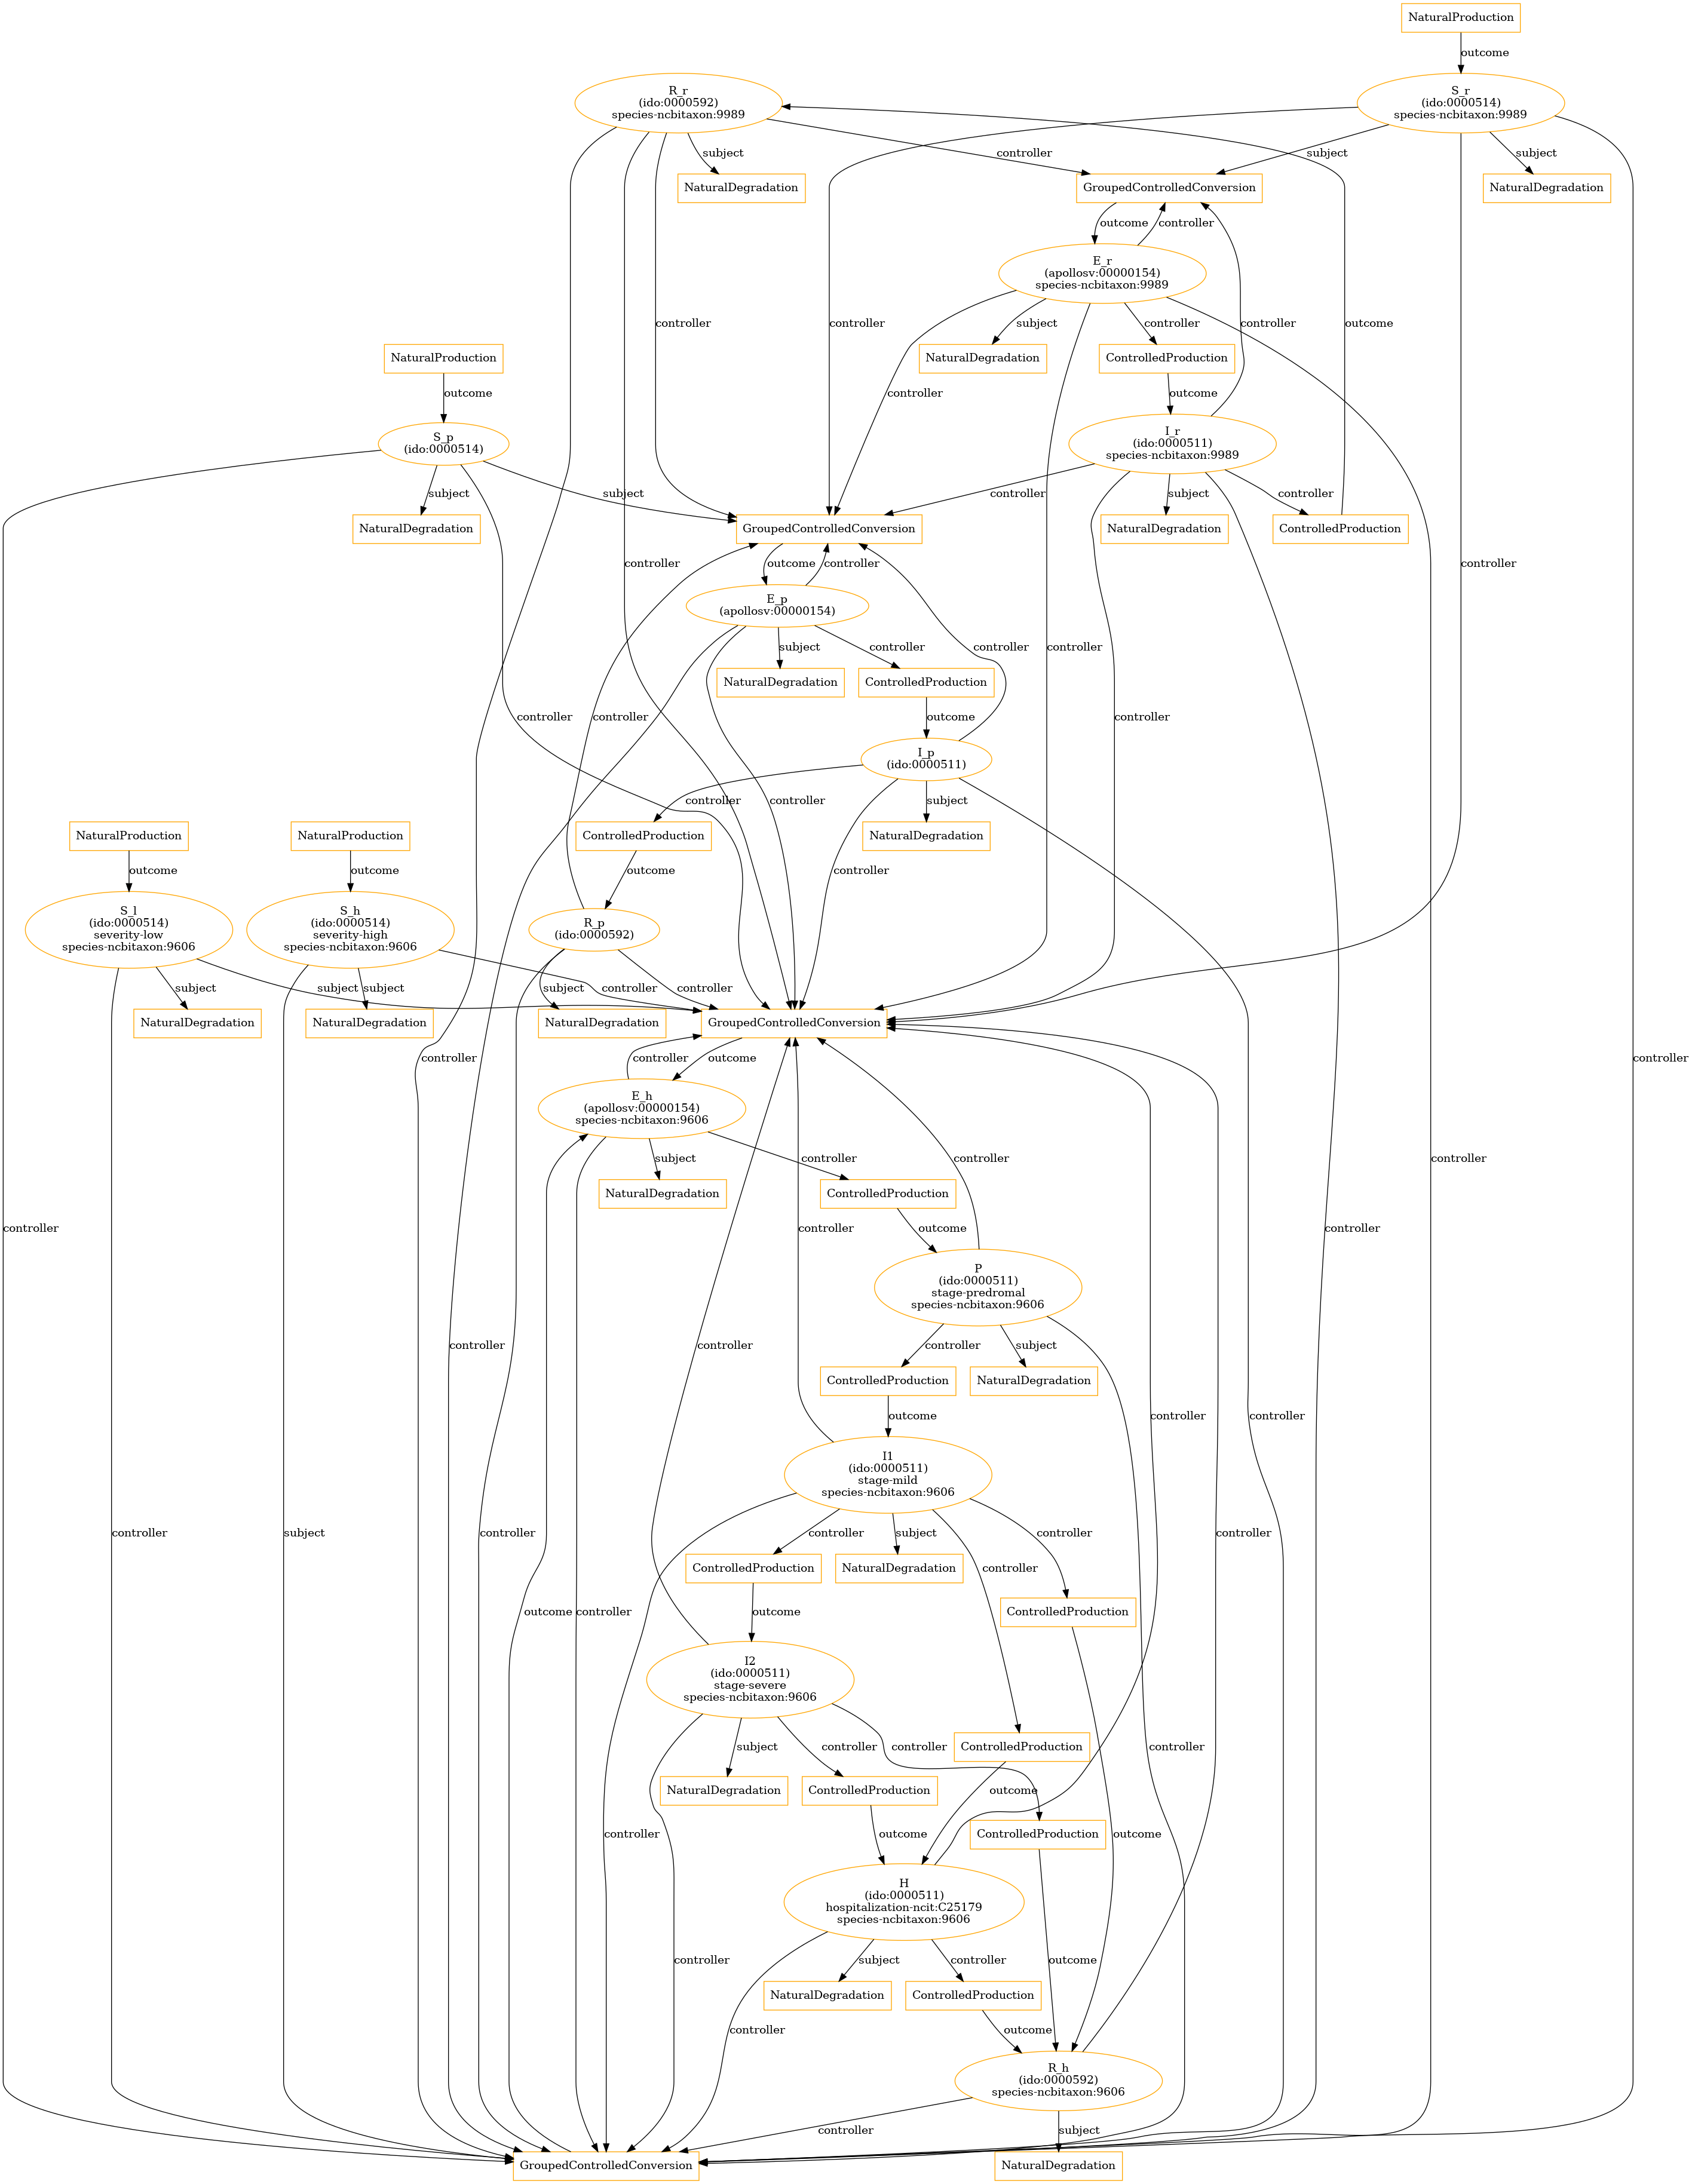

In [131]:
tm.draw_jupyter()

In [133]:
from mira.modeling import Model
from mira.modeling.ode import OdeModel, simulate_ode_model

In [134]:
om = OdeModel(Model(tm), initialized=True)

In [135]:
om.get_interpretable_kinetics()

Matrix([
[Derivative(S_l, t), =,                                -S_l*mu_h - S_l + pi_h*(1 - rho)],
[ Derivative(I2, t), =,                      I1*theta - I2*(delta_i + k2 + mu_h + tau2)],
[Derivative(R_r, t), =,                                            I_r*tau_r - R_r*mu_r],
[ Derivative(I1, t), =,                        -I1*(k1 + mu_h + tau1 + theta) + P*omega],
[Derivative(R_h, t), =,                           H*tau3 + I1*tau1 + I2*tau2 - R_h*mu_h],
[  Derivative(P, t), =,                                  E_h*sigma_h - P*(mu_h + omega)],
[Derivative(S_h, t), =,                                      -S_h*mu_h - S_h + pi_h*rho],
[  Derivative(H, t), =,                      -H*(delta_h + mu_h + tau3) + I1*k1 + I2*k2],
[Derivative(I_r, t), =,                      E_r*sigma_r - I_r*(delta_r + mu_r + tau_r)],
[Derivative(E_h, t), =,                               -E_h*(mu_h + sigma_h) + S_h + S_l],
[Derivative(S_r, t), =,      -I_r*S_r*beta_rr/(E_r + I_r + R_r + S_r) - S_r*mu_r + pi_r],
[

In [136]:
om.get_interpretable_observables()

Matrix([[pet_human_infected, =, I1 + I2 + I_p]])

In [137]:
import numpy as np
import matplotlib.pyplot as plt

nweeks = 35
times = np.linspace(0, nweeks*7, nweeks)
res = simulate_ode_model(om, times, with_observables=True)

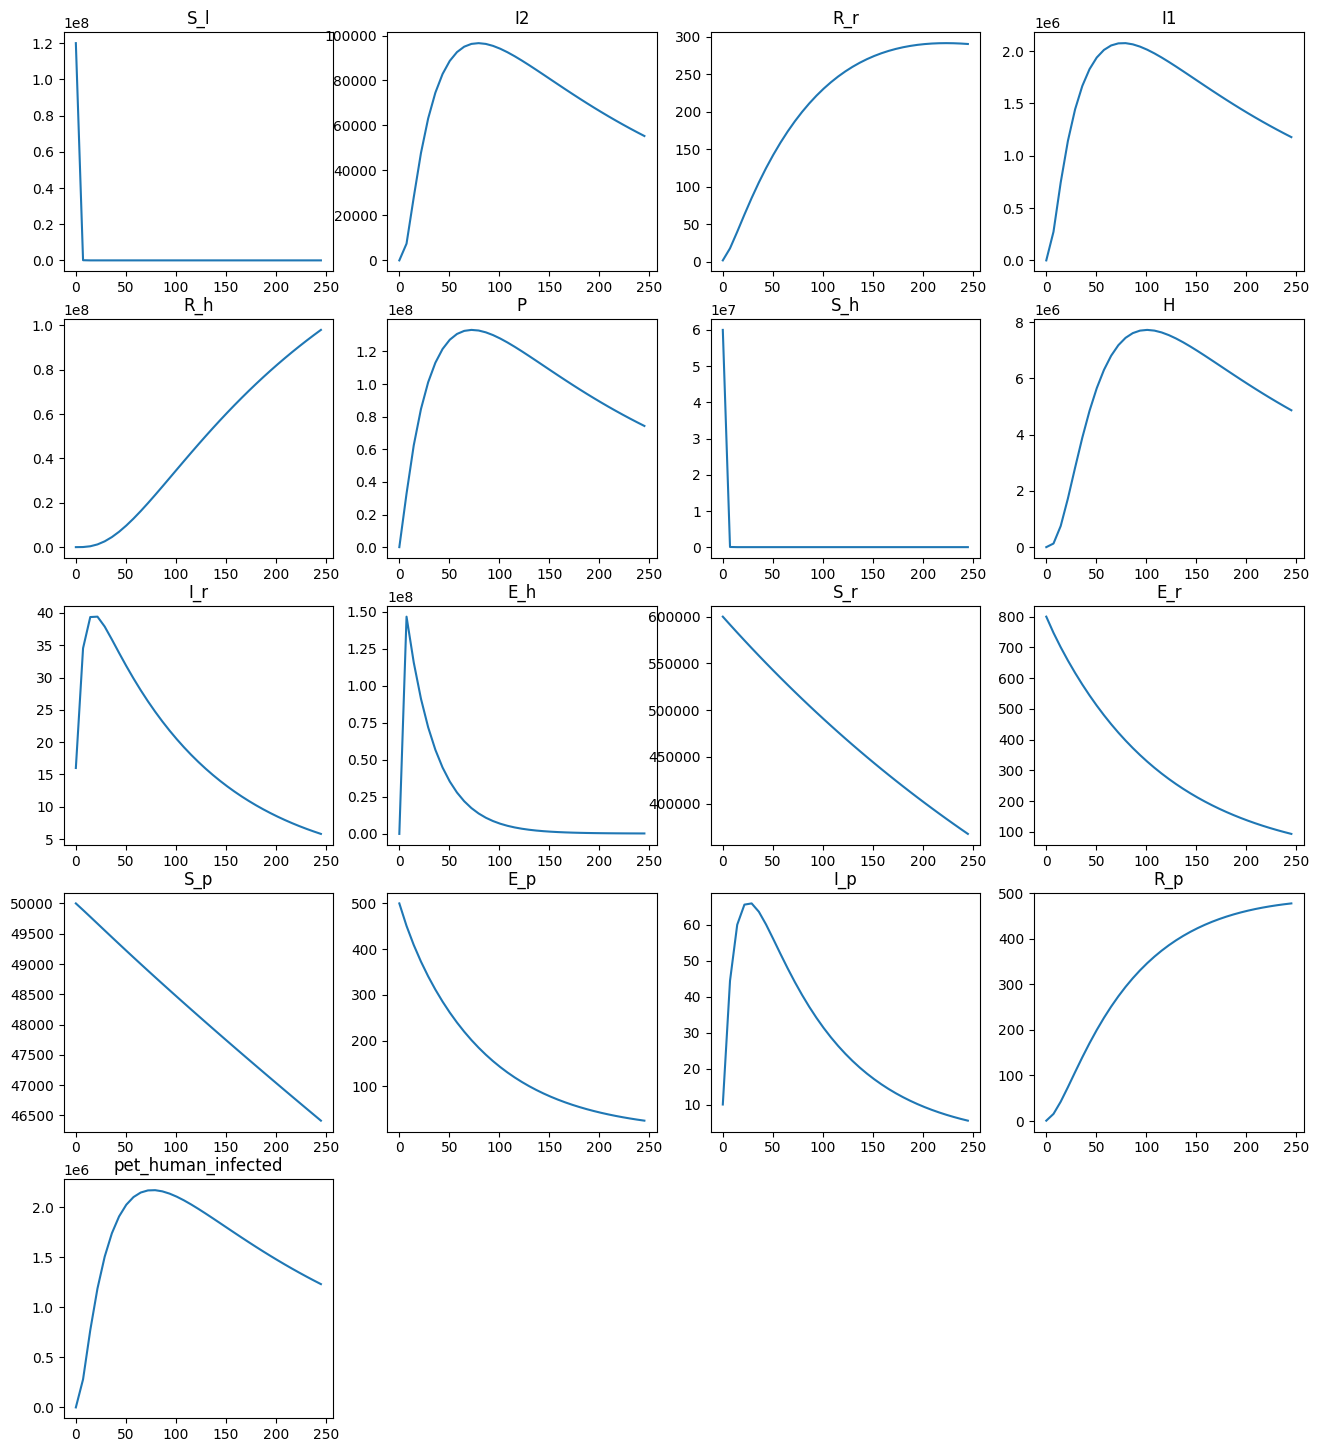

In [138]:
om.plot_simulation_results(times, res)